In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train_df = pd.read_csv('training_set_features.csv', index_col = 'respondent_id')

In [5]:
train_labels_df = pd.read_csv('training_set_labels.csv', index_col = 'respondent_id')

In [6]:
test_df = pd.read_csv('test_set_features.csv', index_col = 'respondent_id')

In [7]:
joined_df = train_df.join(train_labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [8]:
numeric_cols = train_df.select_dtypes('number').columns

In [9]:
categorical_cols = ['race', 'sex', 'marital_status', 'rent_or_own', 'hhs_geo_region','census_msa', 'employment_industry', 'employment_occupation']

In [10]:
ordered_cols = ['age_group', 'education', 'income_poverty', 'employment_status']

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from category_encoders import OrdinalEncoder as oe
from catboost import CatBoostClassifier
from catboost import Pool, cv
from sklearn.metrics import roc_curve, roc_auc_score
import optuna

In [12]:
train_df.isnull().sum()

xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [13]:
for i in numeric_cols:
    train_df[i] = train_df[i].fillna(value = -1)

In [14]:
for i in (categorical_cols + ordered_cols):
    train_df[i] = train_df[i].fillna(value = 'missing')

In [15]:
train_df.isnull().sum()

xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [16]:
test_df.isnull().sum()

xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
marital_status                  1442
r

In [17]:
for i in numeric_cols:
    test_df[i] = test_df[i].fillna(value = -1)

In [18]:
for i in (categorical_cols + ordered_cols):
    test_df[i] = test_df[i].fillna(value = 'missing')

In [19]:
test_df.isnull().sum()

xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(train_df, train_labels_df, test_size = 0.3, random_state = 68)

In [22]:
categorical_features_indices = np.where(X_train.dtypes != float)[0]
categorical_features_indices

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34], dtype=int64)

In [23]:
model_xyz = CatBoostClassifier(verbose = False,
                               cat_features = categorical_features_indices,
                               iterations = 500, 
                               learning_rate = 0.05745075659543725, 
                               random_strength = 4, 
                               bagging_temperature = 8, 
                               max_bin = 5, 
                               grow_policy = 'Lossguide', 
                               min_data_in_leaf = 7, 
                               max_depth = 6, 
                               l2_leaf_reg = 11.323094517862078, 
                               one_hot_max_size = 10, 
                               auto_class_weights = 'Balanced')

In [24]:
model_xyz.fit(X_train, y_train.xyz_vaccine)

In [25]:
pred_xyz = model_xyz.predict_proba(X_test)
print(pred_xyz.shape)
pred_xyz

(8013, 2)


array([[0.85118976, 0.14881024],
       [0.75237268, 0.24762732],
       [0.85585417, 0.14414583],
       ...,
       [0.97772433, 0.02227567],
       [0.39955276, 0.60044724],
       [0.4965449 , 0.5034551 ]])

In [26]:
pred_xyz = pred_xyz[:, 1].reshape(-1, 1)
print(pred_xyz.shape)
pred_xyz

(8013, 1)


array([[0.14881024],
       [0.24762732],
       [0.14414583],
       ...,
       [0.02227567],
       [0.60044724],
       [0.5034551 ]])

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

In [28]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color = 'grey', linestyle = '--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

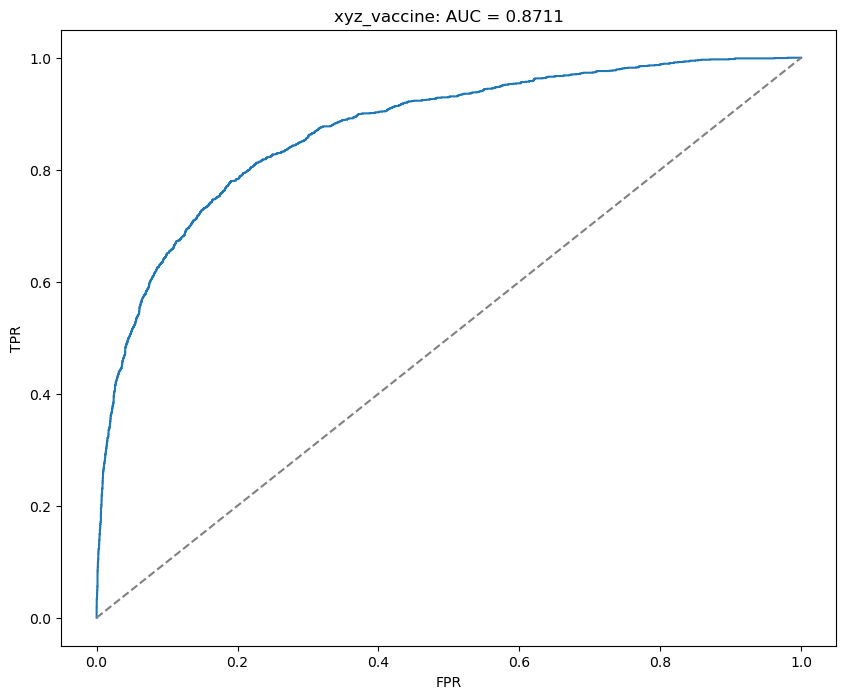

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_roc(y_test['xyz_vaccine'],
        pred_xyz,
        'xyz_vaccine',
        ax = ax)

In [30]:
roc_auc_score(y_test.xyz_vaccine, pred_xyz)

0.8710964730481472

In [31]:
model_seasonal = CatBoostClassifier(verbose = False, 
                                    cat_features = categorical_features_indices,
                                    iterations = 1500, 
                                    learning_rate = 0.015393853845985255, 
                                    random_strength = 3, 
                                    bagging_temperature = 7, 
                                    max_bin = 8, 
                                    grow_policy = 'Lossguide', 
                                    min_data_in_leaf = 1, 
                                    max_depth = 5, 
                                    l2_leaf_reg = 0.03977425239611938, 
                                    one_hot_max_size = 500, 
                                    auto_class_weights = 'Balanced')

In [32]:
model_seasonal.fit(X_train, y_train.seasonal_vaccine)

In [33]:
pred_seasonal = model_seasonal.predict_proba(X_test)
print(pred_seasonal.shape)
pred_seasonal

(8013, 2)


array([[0.04118411, 0.95881589],
       [0.54907567, 0.45092433],
       [0.52939927, 0.47060073],
       ...,
       [0.8923699 , 0.1076301 ],
       [0.59781668, 0.40218332],
       [0.11581474, 0.88418526]])

In [34]:
pred_seasonal = pred_seasonal[:, 1].reshape(-1, 1)
print(pred_seasonal.shape)
pred_seasonal

(8013, 1)


array([[0.95881589],
       [0.45092433],
       [0.47060073],
       ...,
       [0.1076301 ],
       [0.40218332],
       [0.88418526]])

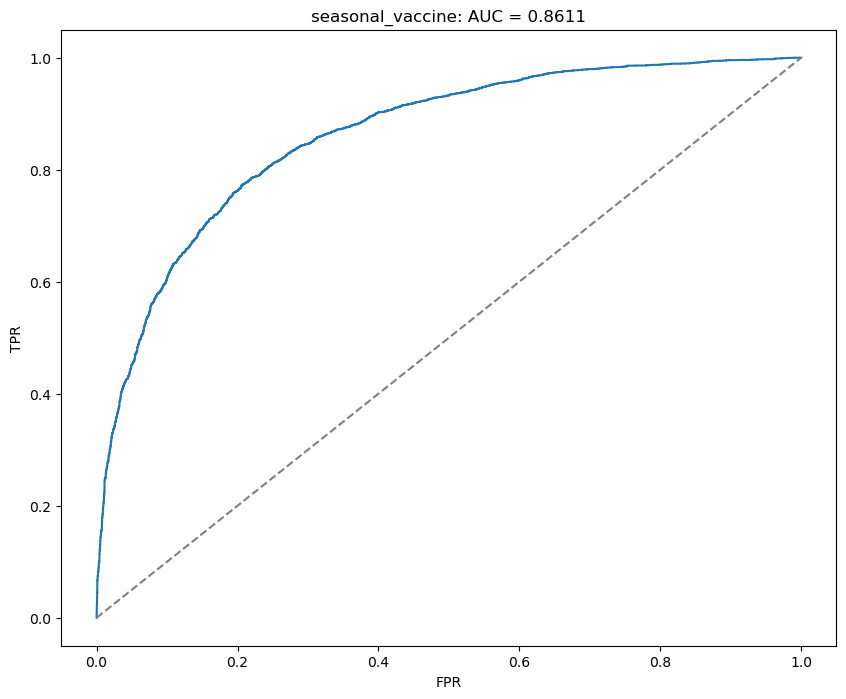

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_roc(
    y_test['seasonal_vaccine'], 
    pred_seasonal, 
    'seasonal_vaccine',
    ax = ax
)

In [36]:
roc_auc_score(y_test.seasonal_vaccine, pred_seasonal)

0.8610964066568754

In [37]:
roc_auc_score(y_test, np.hstack((pred_xyz, pred_seasonal)))

0.8660964398525113

In [38]:
model_xyz.fit(train_df, train_labels_df.xyz_vaccine)

In [39]:
final_xyz = model_xyz.predict_proba(test_df)
print(final_xyz.shape)
final_xyz

(26708, 2)


array([[0.6169902 , 0.3830098 ],
       [0.90331393, 0.09668607],
       [0.51103702, 0.48896298],
       ...,
       [0.63509946, 0.36490054],
       [0.95857877, 0.04142123],
       [0.26207364, 0.73792636]])

In [40]:
final_xyz = final_xyz[:, 1].reshape(-1, 1)
print(final_xyz.shape)
final_xyz

(26708, 1)


array([[0.3830098 ],
       [0.09668607],
       [0.48896298],
       ...,
       [0.36490054],
       [0.04142123],
       [0.73792636]])

In [41]:
model_seasonal.fit(train_df, train_labels_df.seasonal_vaccine)

In [42]:
final_seasonal = model_seasonal.predict_proba(test_df)
print(final_seasonal.shape)
final_seasonal

(26708, 2)


array([[0.72757901, 0.27242099],
       [0.95689808, 0.04310192],
       [0.27044331, 0.72955669],
       ...,
       [0.80458174, 0.19541826],
       [0.66694027, 0.33305973],
       [0.33169885, 0.66830115]])

In [43]:
final_seasonal = final_seasonal[:, 1].reshape(-1, 1)
print(final_seasonal.shape)
final_seasonal

(26708, 1)


array([[0.27242099],
       [0.04310192],
       [0.72955669],
       ...,
       [0.19541826],
       [0.33305973],
       [0.66830115]])

In [44]:
submission_df = pd.read_csv('submission_format.csv', index_col = 'respondent_id', usecols = ['respondent_id', 'seasonal_vaccine'])
submission_df

,seasonal_vaccine
respondent_id,
26707,0.7
26708,0.7
26709,0.7
26710,0.7
26711,0.7
...,...
53410,0.7
53411,0.7
53412,0.7


In [45]:
np.testing.assert_array_equal(test_df.index.values, 
                              submission_df.index.values)
submission_df["xyz_vaccine"] = final_xyz
submission_df["seasonal_vaccine"] = final_seasonal
submission_df = submission_df[['xyz_vaccine', 'seasonal_vaccine']]
submission_df.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
26707,0.383010,0.272421
26708,0.096686,0.043102
26709,0.488963,0.729557
26710,0.876236,0.887549
26711,0.654207,0.485935


In [46]:
submission_df.to_csv('hackathon_submission.csv', index = True)